# 1. Basic Pandas Operations

In [191]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [192]:
# Read the dataset and display the head
df = pd.read_csv('data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [193]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [194]:
df.shape

(2227, 3)

# 2. Check for null values in the feature variables

In [195]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [196]:
df['x1'].fillna(df['x1'].mean(skipna=True), inplace=True)
df['x2'].fillna(df['x2'].mean(skipna=True), inplace=True)

In [197]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# 3. Check for outliers¶


<AxesSubplot:xlabel='y'>

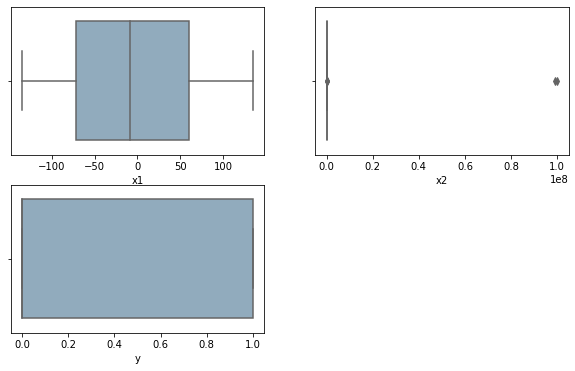

In [198]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(df['x1'])
plt.subplot(222)
sns.boxplot(df['x2'])
plt.subplot(223)
sns.boxplot(df['y'])


In [199]:
Q1,Q3 = np.percentile(df['x2'], [25,75])
IQR = Q3 - Q1
LL= Q1 - 1.5*IQR
UL= Q3 + 1.5*IQR

In [200]:
df = df[(df['x2'] > LL) & (df['x2'] < UL)]

<AxesSubplot:xlabel='y'>

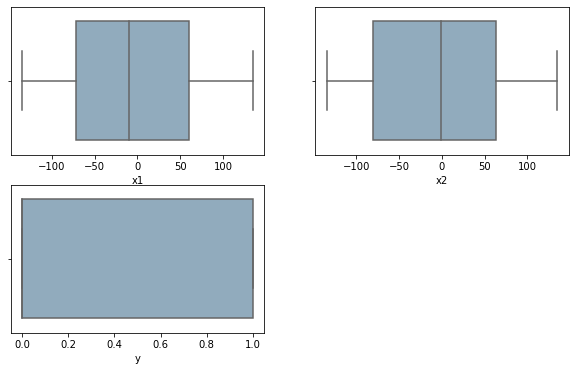

In [201]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(df['x1'])
plt.subplot(222)
sns.boxplot(df['x2'])
plt.subplot(223)
sns.boxplot(df['y'])


In [202]:
df

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2221,88.129639,107.514918,0
2222,98.714112,89.643117,0
2223,96.633331,91.000000,0
2224,85.673940,103.839270,0


<AxesSubplot:>

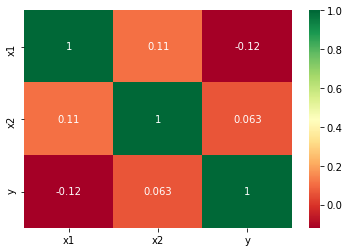

In [203]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

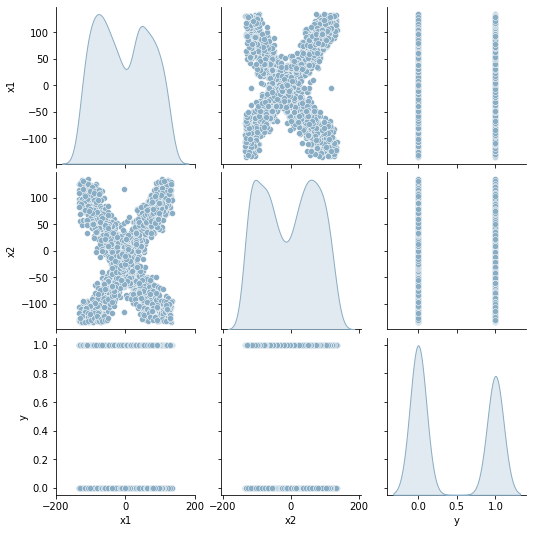

In [204]:
sns.pairplot(df1 ,diag_kind="kde",kind="scatter")
plt.show()

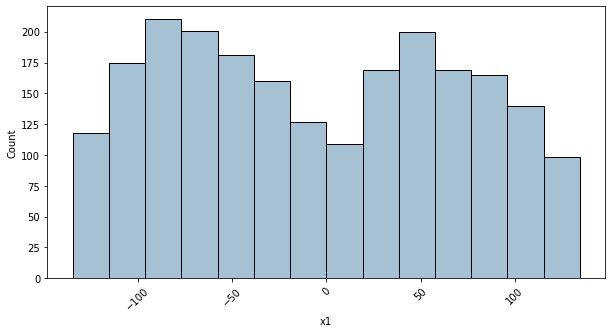

In [205]:
plt.figure(figsize=(10,5))
sns.histplot(df['x1'])
plt.xticks( rotation=45)
sns.set_palette(sns.color_palette("twilight"))
plt.show()

<AxesSubplot:xlabel='y'>

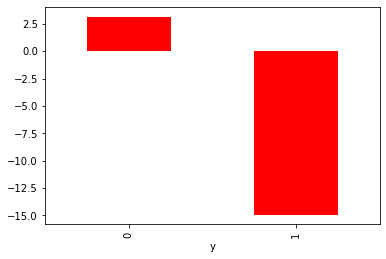

In [206]:
df.groupby('y')["x1"].mean().plot(kind="bar",color="red")

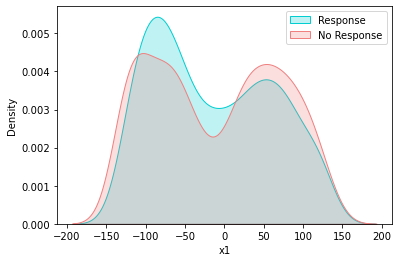

In [207]:
sns.kdeplot(df['x1'][df['y']==1],color='darkturquoise', shade=True)
sns.kdeplot(df['x2'][df['y']==0],color='lightcoral', shade=True)
plt.legend(['Response', 'No Response'])

# Step - 2: Train different Machine Learning models:

Logistic Regression

SVM with Linear Kernel

SVM with RBF Kernel

Decision Tree

KNN


In [208]:
X = df[["x1","x2"]]
y = df["y"]

In [209]:
#split the data into train and test
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [210]:
X_train.shape

(1777, 2)

In [211]:
y_train.shape

(1777,)

In [212]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
fit = sc.fit(X_train)
X_train = fit.transform(X_train)
X_test = sc.transform(X_test)

# Apply The Logistic Regression Model.

In [213]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,5,10],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [214]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [215]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [216]:
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.7563437172416937
Best Params:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [217]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 1, max_iter= 100, penalty= 'l1', solver= 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [218]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       247
           1       1.00      0.37      0.54       198

    accuracy                           0.72       445
   macro avg       0.83      0.68      0.67       445
weighted avg       0.81      0.72      0.68       445



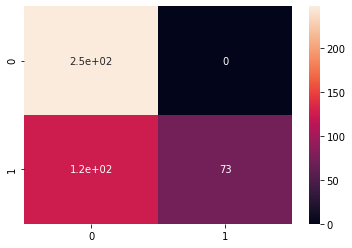

In [219]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

In [220]:
from sklearn.metrics import roc_curve
[fpr_log, tpr_log, thr] = roc_curve(y_test, y_pred_proba)

In [221]:
from sklearn.metrics import auc
auc (fpr_log, tpr_log)

0.5311822680243734

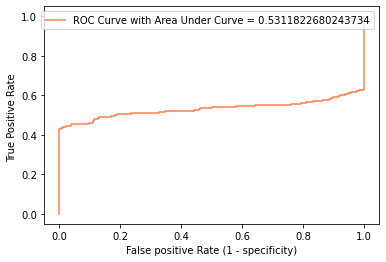

In [222]:
plt.figure()
plt.plot(fpr_log, tpr_log, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr_log, tpr_log)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='upper right')
plt.show()

# SVM with Linear Kernel


In [223]:
from sklearn.svm import SVC
model=SVC()

In [224]:
param_svm= [    
    {'kernel':['linear'],'C' : [1,5,10],'degree':[1,2,3,4,5,6]}
]
grid = GridSearchCV(model, param_grid = param_svm)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 5, 10], 'degree': [1, 2, 3, 4, 5, 6],
                          'kernel': ['linear']}])

In [225]:
grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'linear'}

In [226]:
svc = SVC(kernel='linear', C=1,degree=1).fit(X, y)

In [227]:
y_pred = svc.predict(X_test)

<AxesSubplot:>

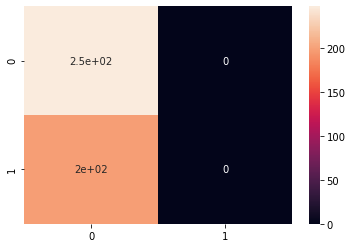

In [228]:

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [229]:
[fpr_li, tpr_li, thr] = roc_curve(y_test, y_pred)

In [230]:

auc (fpr_li, tpr_li)

0.5

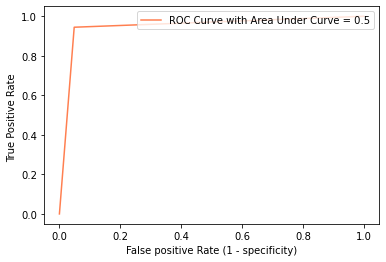

In [231]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr_li, tpr_li)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='upper right')
plt.show()

# SVM with RBF Kernel

In [232]:
from sklearn.svm import SVC
model=SVC()
param_svm= [    
    {'kernel':['rbf'],'C' : [1,5,10],'degree':[1,2,3,4,5,6]}
]
grid = GridSearchCV(model, param_grid = param_svm)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 5, 10], 'degree': [1, 2, 3, 4, 5, 6],
                          'kernel': ['rbf']}])

In [233]:
grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'rbf'}

In [234]:
svc = SVC(kernel='rbf', C=1,degree=1).fit(X_train, y_train)

In [235]:
y_pred = svc.predict(X_test)

<AxesSubplot:>

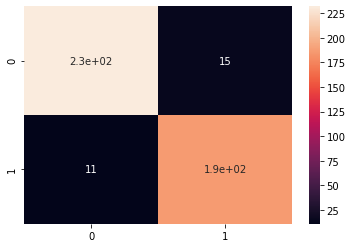

In [236]:

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [237]:
[fpr_rbf, tpr_rbf, thr] = roc_curve(y_test, y_pred)

In [238]:
auc (fpr_rbf, tpr_rbf)

0.9418578497525866

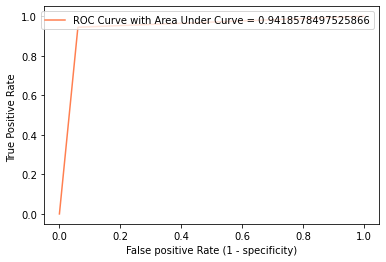

In [239]:
plt.figure()
plt.plot(fpr_rbf, tpr_rbf, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr_rbf, tpr_rbf)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='upper right')
plt.show()

# Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier

In [241]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.9348314606741573


In [242]:
param_grid={'criterion':['gini', 'entropy'],'max_depth':[1,2,3,4,5,6,7,None]}

In [243]:
grid = GridSearchCV(DT_model, param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [244]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [245]:
DT_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 5)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [246]:
y_pred = DT_model.predict(X_test)

<AxesSubplot:>

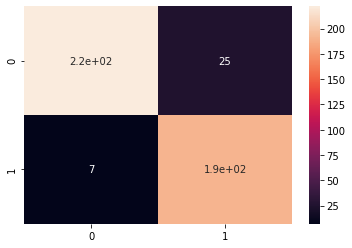

In [247]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [248]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       247
           1       0.88      0.96      0.92       198

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445



In [249]:

[fpr_df, tpr_df, thr] = roc_curve(y_test, y_pred)

In [250]:

auc (fpr_df, tpr_df)

0.9317159448738396

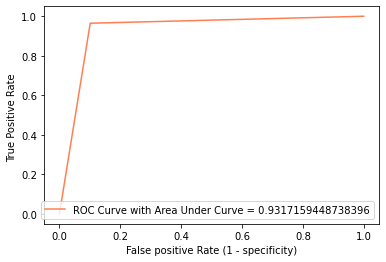

In [251]:
plt.figure()
plt.plot(fpr_df, tpr_df, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr_df, tpr_df)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

# KNN

In [252]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

k=np.random.randint(1,50,60)
params={'n_neighbors':k}
random=RandomizedSearchCV(clf,params,cv=5,n_iter=5,n_jobs=-1,verbose=0)
random.fit(X_train,y_train)
random.score(X_train,y_train)

0.9561057962858751

In [253]:
random.best_params_

{'n_neighbors': 9}

In [254]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 46)
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=46)

In [255]:
y_pred =clf.predict(X_test)

In [256]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       247
           1       0.94      0.93      0.94       198

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



<AxesSubplot:>

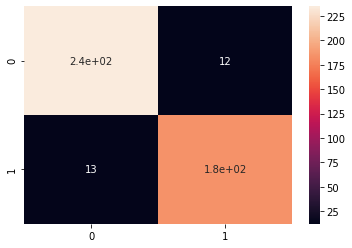

In [257]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [258]:
from sklearn.metrics import roc_curve
[fpr_knn, tpr_knn, thr] = roc_curve(y_test, y_pred)

In [259]:

auc (fpr_knn, tpr_knn)

0.9428802191960086

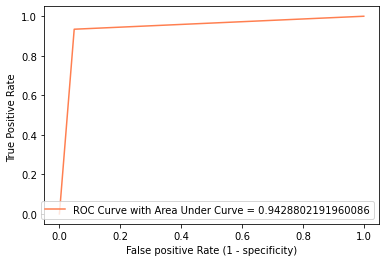

In [260]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr_knn, tpr_knn)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

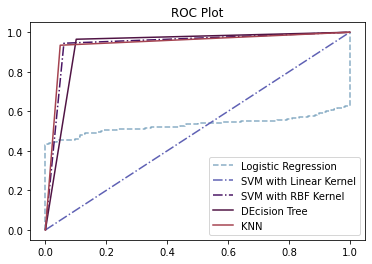

In [261]:


plt.plot(fpr_log, tpr_log, linestyle='--', label = 'Logistic Regression')
plt.plot(fpr_li, tpr_li, linestyle='-.', label = 'SVM with Linear Kernel')
plt.plot(fpr_rbf, tpr_rbf, linestyle='-.', label = 'SVM with RBF Kernel')
plt.plot(fpr_df, tpr_df, linestyle='-', label = 'DEcision Tree')
plt.plot(fpr_knn, tpr_knn, linestyle='-', label = 'KNN')
plt.title('ROC Plot')
plt.legend()
plt.show()

# why is one model better than the other?

After analysing all algorithm. KNN has high ROC Curve .So that KNN good choice for this problem compare to all algorithm.